<a href="https://colab.research.google.com/github/jplavorr/Wavelets/blob/main/Wavelets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wavelets

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

### Exemplo de Fourier 1

In [111]:
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

# Sinal como soma de frequências
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) + np.sin(2*np.pi*200*t) # Soma de duas frequências
f_clean = f
f = f + 2.5*np.random.randn(len(t))              # Adiciona ruído

In [106]:
## Coomputa a transformada rápida de Fourier

n = len(t)
fhat = np.fft.fft(f,n)                     # Computa a FFT
PSD = fhat * np.conj(fhat) / n             # Power spectrum (power per freq)
freq = (1/(dt*n)) * np.arange(n)           # Create x-axis of frequencies in Hz
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs

In [107]:
## Use the PSD to filter out noise
indices = PSD > 100       # Ache todas as frequências com sinal maior que tal valor
PSDclean = PSD * indices  # irá zerar todos os sinais menores
fhat = indices * fhat     # Irá zerar índices menores de freq
ffilt = np.fft.ifft(fhat) # Chama a transformada inversa de fourier para recuperar o sinal

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


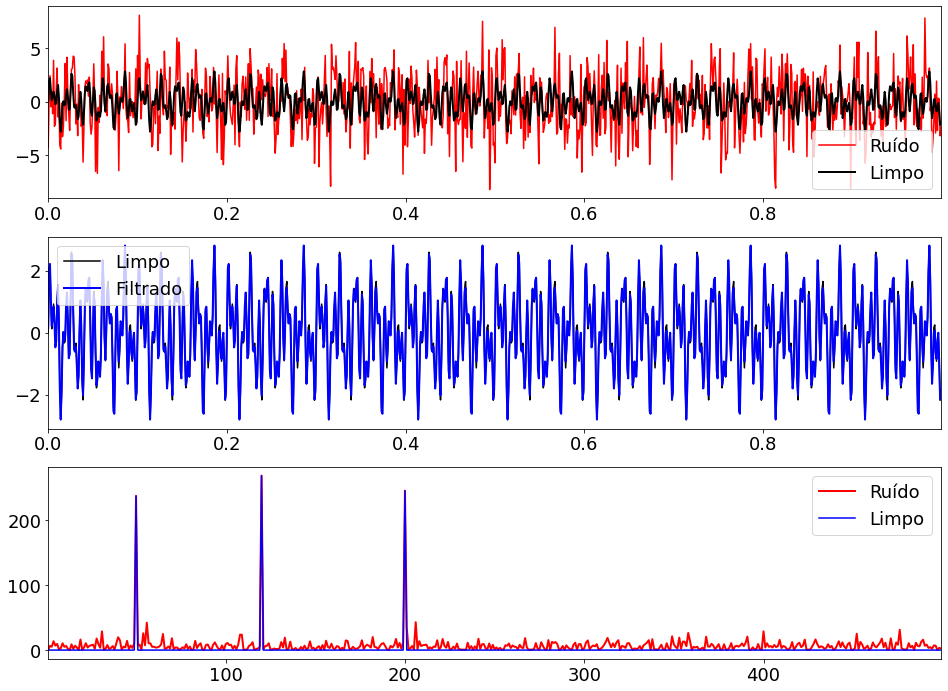

In [114]:
## Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',linewidth=1.5,label='Ruído')
plt.plot(t,f_clean,color='k',linewidth=2, label='Limpo')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='r',linewidth=2,label='Ruído')
plt.plot(freq[L],PSDclean[L],color='b',linewidth=1.5,label='Limpo')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.sca(axs[1])
plt.plot(t,f_clean,color='k',linewidth=1.5,label='Limpo')
plt.plot(t,ffilt,color='b',linewidth=2,label='Filtrado')
plt.xlim(t[0],t[-1])
plt.legend()


plt.show()

## Exemplo do semáforo

In [45]:
def generate_sine_wave(freq, sample_rate, start, end):
    duration = end - start
    x = np.linspace(start, end, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

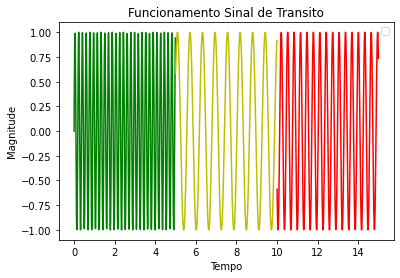

In [81]:
SAMPLE_RATE = 100
# line 1 points
x1, y1 = generate_sine_wave(5.45, SAMPLE_RATE, 0, 5)
x2, y2 = generate_sine_wave(1.62, SAMPLE_RATE, 5, 10)
x3, y3 = generate_sine_wave(3.16, SAMPLE_RATE, 10, 15)


# plotting the line 1 points 
plt.plot(x1, y1,color="g")
plt.plot(x2, y2, color="y")
plt.plot(x3, y3, color="r")
plt.title('Funcionamento Sinal de Transito')
  
# naming the x axis
plt.xlabel('Tempo')
# naming the y axis
plt.ylabel('Magnitude')
plt.legend()

# function to show the plot
plt.show()

In [82]:
mixed_tone = y1+y2+y3

In [83]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front


def fourier_transform(y, sample, start, end):
  # Number of samples in normalized_tone
  duration = end - start
  N = sample*duration
  #normalized_tone = np.int16((y / y.max()) * 32767)
  yf = rfft(y)
  xf = rfftfreq(N, 1 / SAMPLE_RATE)
  return xf, yf

In [84]:
xf, yf = fourier_transform(mixed_tone, SAMPLE_RATE, 0, 5)

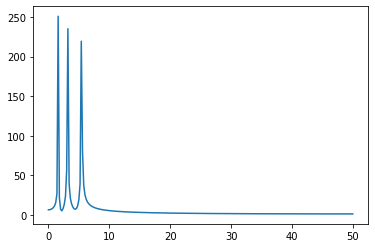

In [85]:
plt.plot(xf, abs(yf))

Text(0.5, 1.0, 'Inicio de um mal Funcionamento')

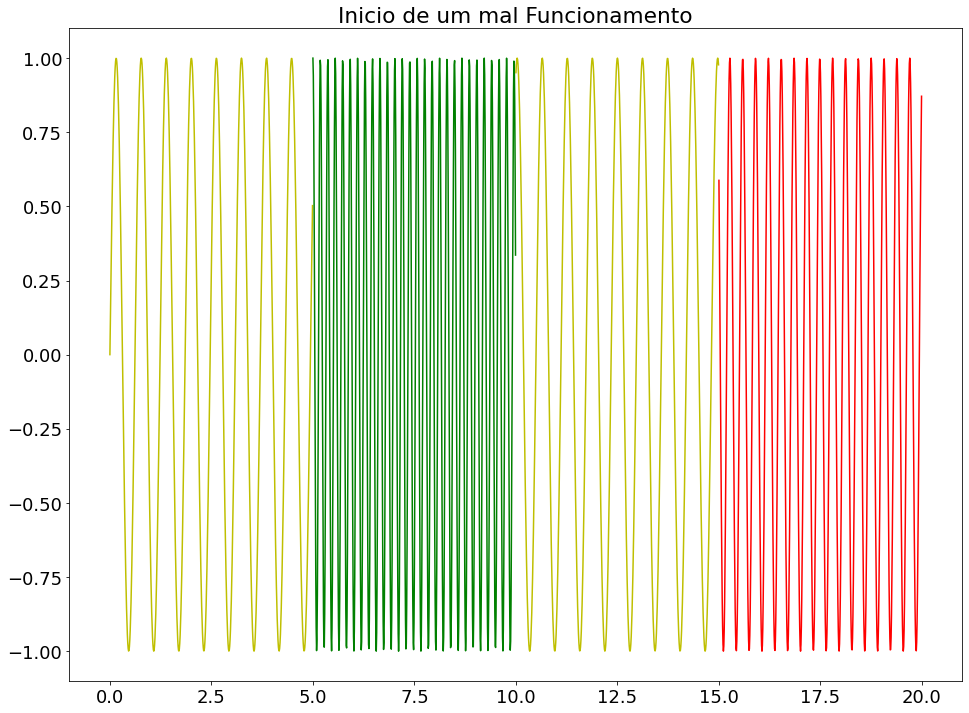

In [116]:
x0, y0 = generate_sine_wave(1.62, SAMPLE_RATE, 0, 5)
x1, y1 = generate_sine_wave(5.45, SAMPLE_RATE, 5, 10)
x2, y2 = generate_sine_wave(1.62, SAMPLE_RATE, 10, 15)
x3, y3 = generate_sine_wave(3.16, SAMPLE_RATE, 15, 20)


# plotting the line 1 points
plt.plot(x0, y0,color="y")
plt.plot(x1, y1,color="g")
plt.plot(x2, y2, color="y")
plt.plot(x3, y3, color="r")
plt.title('Inicio de um mal Funcionamento')

In [89]:
mixed_tone = y1+y2+y3+y0

In [90]:
xf, yf = fourier_transform(mixed_tone, SAMPLE_RATE, 0, 5)

Text(0, 0.5, 'Amplitude')

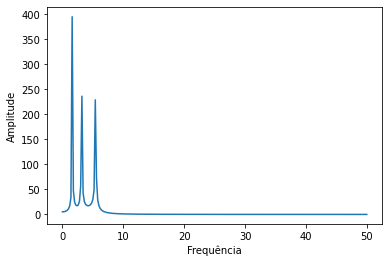

In [95]:
plt.plot(xf, abs(yf))
plt.xlabel("Frequência")
plt.ylabel("Amplitude")

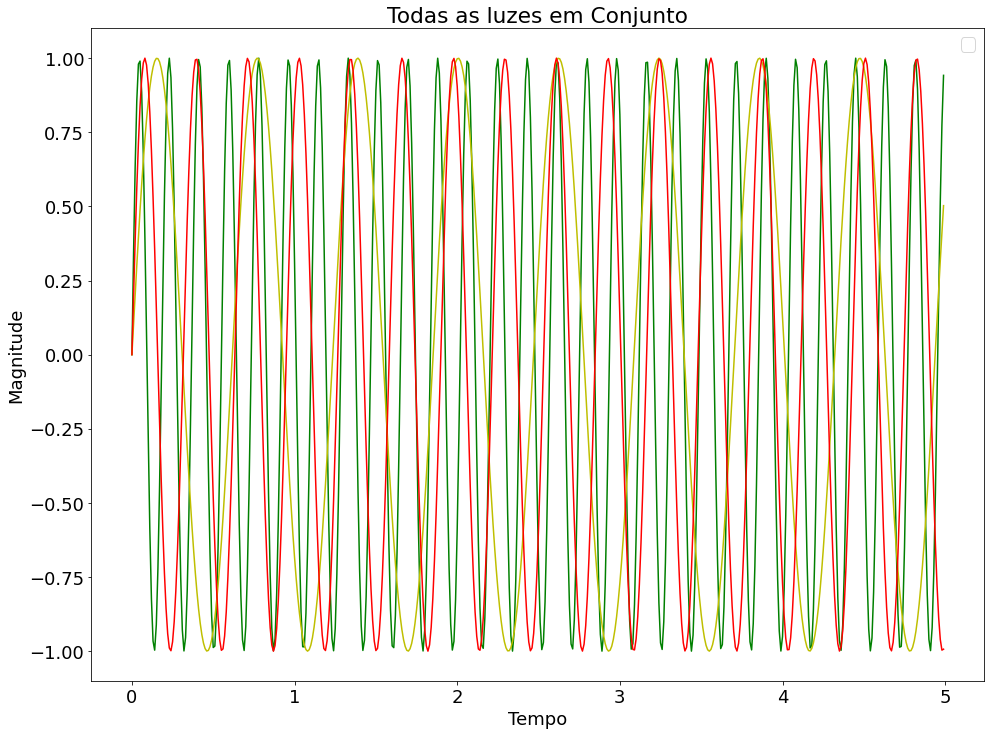

In [120]:
# line 1 points
x1, y1 = generate_sine_wave(5.45, SAMPLE_RATE, 0, 5)
x2, y2 = generate_sine_wave(1.62, SAMPLE_RATE, 0, 5)
x3, y3 = generate_sine_wave(3.16, SAMPLE_RATE, 0, 5)
# plotting the line 1 points
plt.plot(x1, y1,color="g")
plt.plot(x2, y2, color="y")
plt.plot(x3, y3, color="r")
plt.title('Todas as luzes em Conjunto')
  
# naming the x axis
plt.xlabel('Tempo')
# naming the y axis
plt.ylabel('Magnitude')
plt.legend()

# function to show the plot
plt.show()

In [121]:
mixed_tone = y1+y2+y3

In [99]:
xf, yf = fourier_transform(mixed_tone, SAMPLE_RATE, 0, 5)

Text(0, 0.5, 'Amplitude')

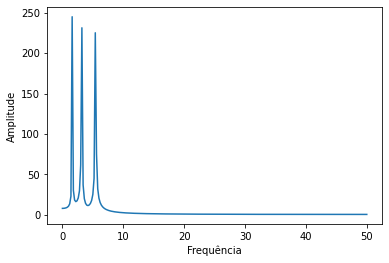

In [100]:
plt.plot(xf, abs(yf))
plt.xlabel("Frequência")
plt.ylabel("Amplitude")

In [118]:
import pywt

In [131]:
Fs  = 100                        #Frequênciad e amostragem 100Hz
t   = np.arange(0, 1, 1/Fs)      #Índice temporal
f   = np.sin(2 * np.pi * t * 545) + np.sin(2 * np.pi * t * 316) + np.sin(2 * np.pi * t * 162)#Sinal senoidal puro de 10Hz
s   = np.arange(1, 5)           #Escalas utilizadas
wav = 'cmor5.0-1.0'              # Wavelet de Complexa de Morlet com B = 5.0 e C = 1.0
fre = pywt.scale2frequency(wav, s) * Fs #Converte escala para as frequências relativas

W, _ = pywt.cwt(f, s, wav, method='fft') #coeficientes wavelets
W    = np.abs(W)**2                      #obtêm o Escalograma

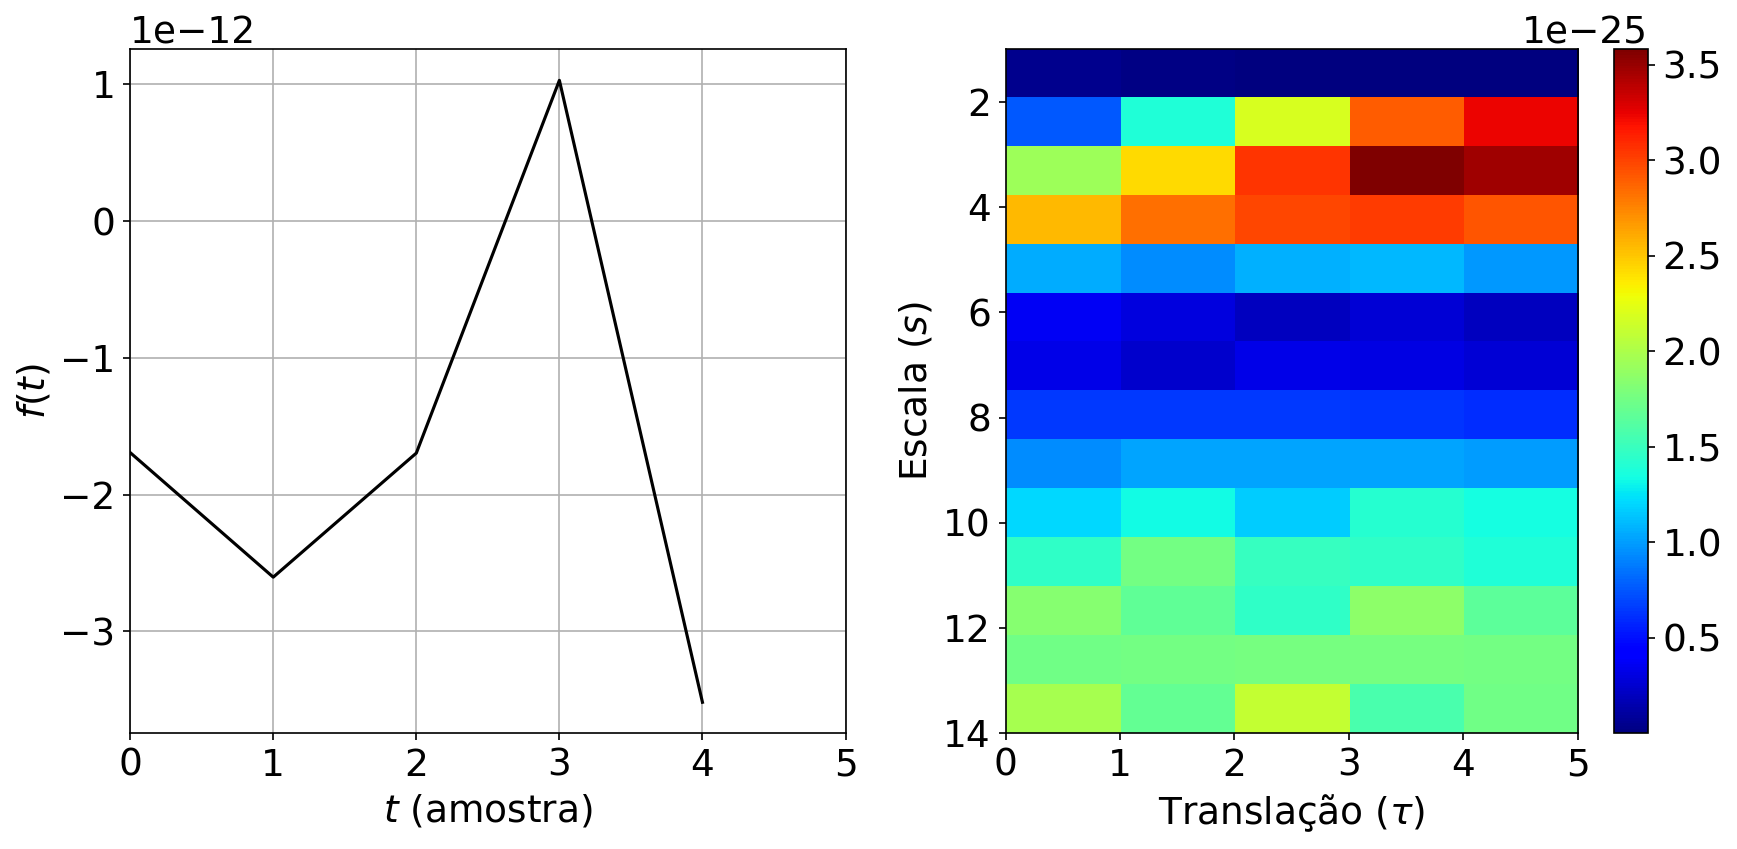

In [132]:
plt.figure(dpi=150,figsize=(12, 6))

plt.subplot(121)
plt.plot(f, color='k')
plt.xlabel('$t $ (amostra)')
plt.ylabel('$f(t)$')
plt.xlim([0, len(f)])
plt.grid()

plt.subplot(122)
plt.imshow(W, extent=[0, len(f), s[-1], s[0]], cmap='jet', aspect='auto')
plt.xlabel('Translação ($\\tau$)')
plt.ylabel('Escala ($s$)')
plt.ylim([s[-1], s[0]])
plt.xlim([0, len(f)])
plt.colorbar()

plt.tight_layout()
plt.show()

# Human Activity Recognition (HAR) Dataset Used

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#Principal Component Analysis (PCA) 

## O que é PCA?
A Análise de Componentes Principais, ou PCA, é um método de redução de dimensionalidade que é frequentemente usado para reduzir a dimensionalidade de grandes conjuntos de dados, transformando um grande conjunto de variáveis ​​em um menor que ainda contém a maioria das informações do conjunto original.

Reduzir o número de variáveis ​​de um conjunto de dados naturalmente vem à custa da precisão, mas o truque na redução da dimensionalidade é trocar um pouco de precisão por simplicidade. Porque conjuntos de dados menores são mais fáceis de explorar e visualizar e tornam a análise de dados muito mais fácil e rápida para algoritmos de aprendizado de máquina sem variáveis ​​estranhas para processar.

Então, para resumir, a ideia do PCA é simples – reduza o número de variáveis ​​de um conjunto de dados, preservando o máximo de informações possível.


# Calculando com SVD

Tem um método mais otimizado de calcular nossas componentes principais, que é calculando a decomposição em valores singulares da nossa matriz $X$.

$$ X =  UΣV^*$$

Onde $U$ é a matriz de vetores singulares à esquerda, $Σ$ é a matriz de valores singulares (matriz diagonal) e  é a matriz de vetores singulares à direita (que é a nossa matriz de autovetores $W$).

Portanto

$$T = XW$$

Multiplicando ambos os lados por V
$$XV = UΣV^*V = UΣ$$

Portanto

$$T = UΣ$$ 

e até mesmo

$$T_r = U_rΣ_r$$

O algoritmo do SVD é muito rápido e mais eficiente do que calcular PCA. Pois não queremos a matriz de covariância.

In [133]:
from matplotlib.image import imread

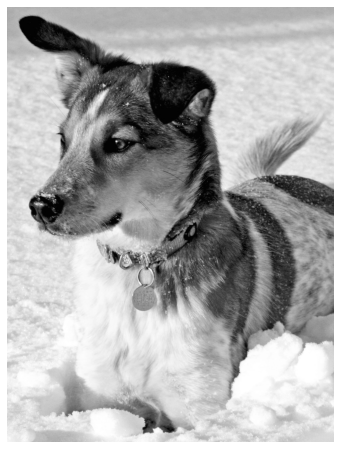

In [157]:
plt.rcParams['figure.figsize'] = [16, 8]


A = imread('/content/drive/MyDrive/Datasets/dog.jpg')
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

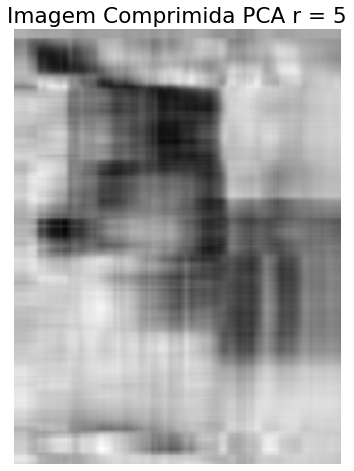

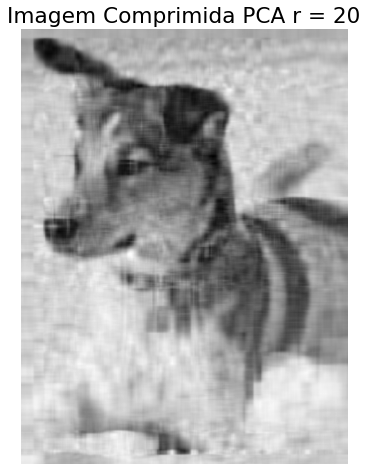

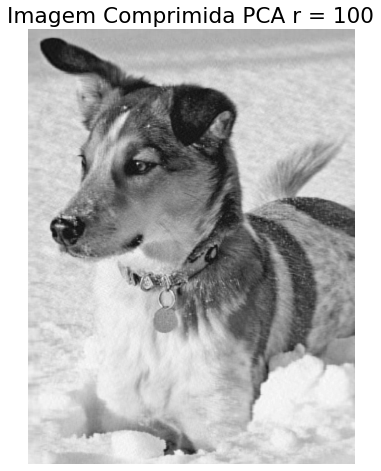

In [158]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('Imagem Comprimida PCA r = ' + str(r))
    plt.show()

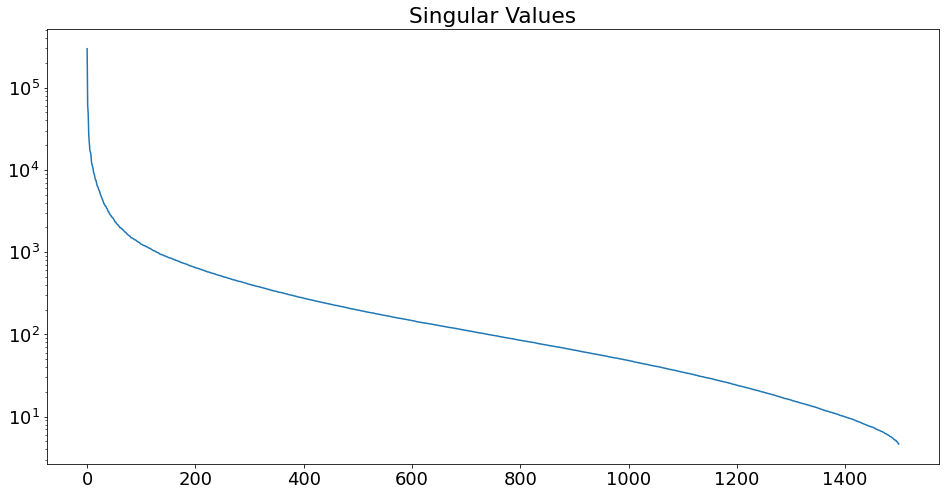

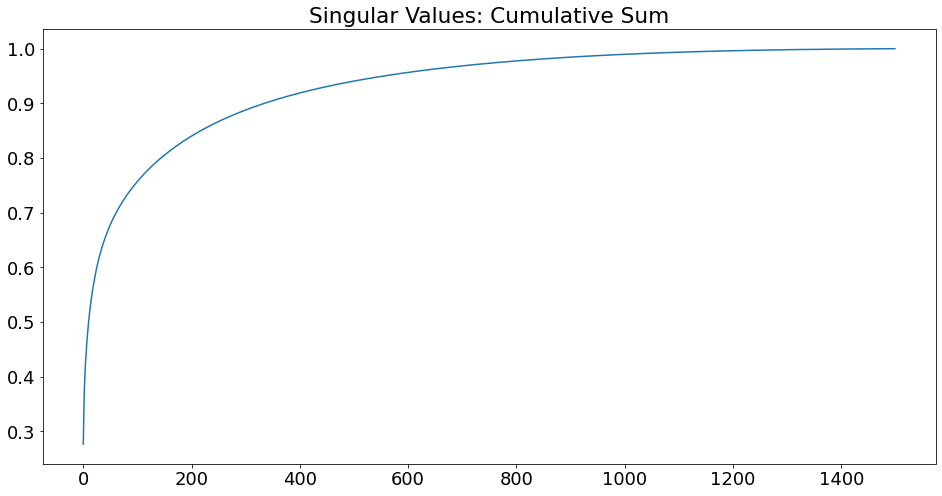

In [136]:
## f_ch01_ex02_2

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

#FFT2

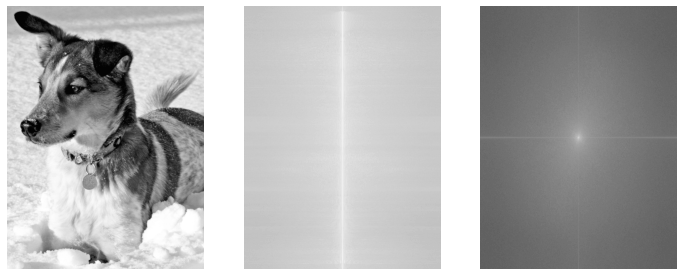

In [137]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

A = imread(os.path.join('/content/drive/MyDrive/Datasets/dog.jpg'))
B = np.mean(A, -1); # Convert RGB to grayscale

fig,axs = plt.subplots(1,3)

# Plot image
img = axs[0].imshow(B)
img.set_cmap('gray')
axs[0].axis('off')

# Compute row-wise FFT

Cshift = np.zeros_like(B,dtype='complex_')
C = np.zeros_like(B,dtype='complex_')

for j in range(B.shape[0]):
    Cshift[j,:] = np.fft.fftshift(np.fft.fft(B[j,:]))
    C[j,:] = np.fft.fft(B[j,:])
    
img = axs[1].imshow(np.log(np.abs(Cshift)))
img.set_cmap('gray')
axs[1].axis('off')

# Compute column-wise FFT

D = np.zeros_like(C)
for j in range(C.shape[1]):
    D[:,j] = np.fft.fft(C[:,j])

img = axs[2].imshow(np.fft.fftshift(np.log(np.abs(D))))
img.set_cmap('gray')
axs[2].axis('off')

plt.show()

# Much more efficient to use fft2
D = np.fft.fft2(B)

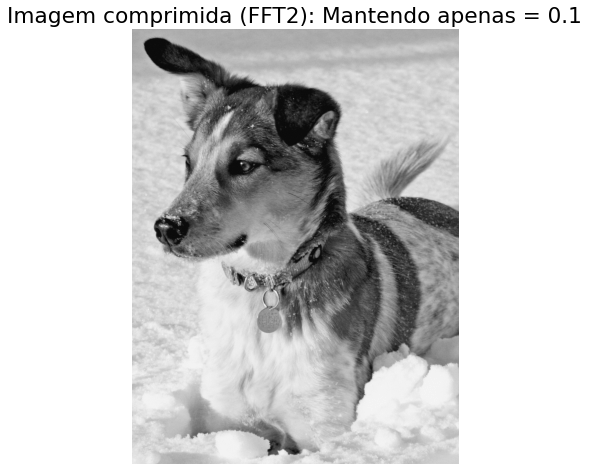

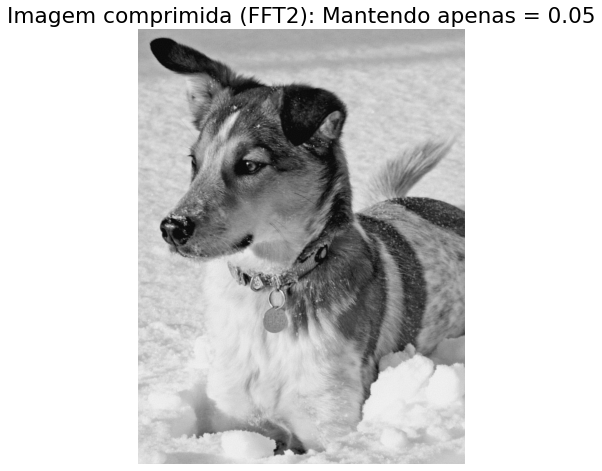

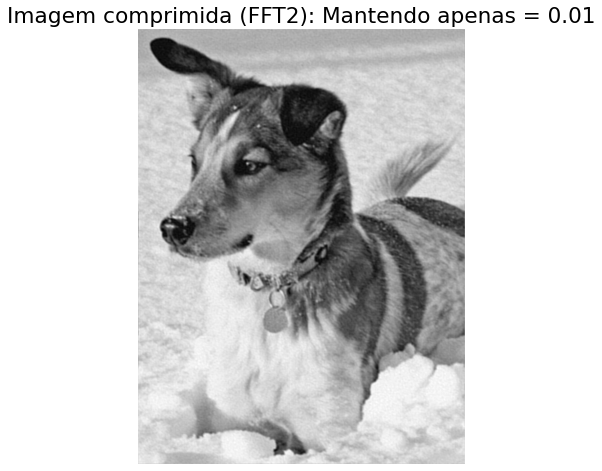

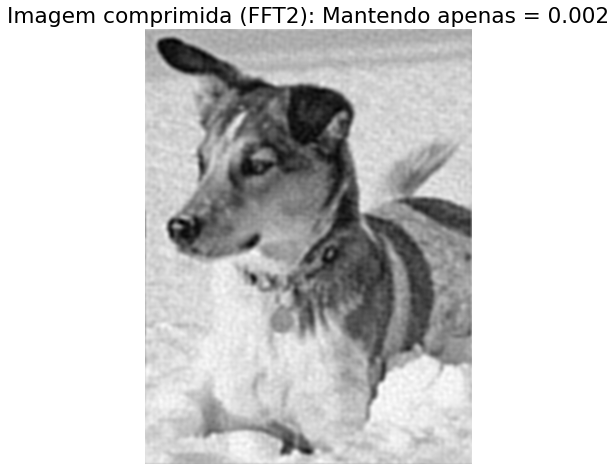

In [155]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

A = imread('/content/drive/MyDrive/Datasets/dog.jpg')
B = np.mean(A, -1); # Convert RGB to grayscale

Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Imagem comprimida (FFT2): Mantendo apenas = ' + str(keep))

## Wavelets

In [138]:
import cv2

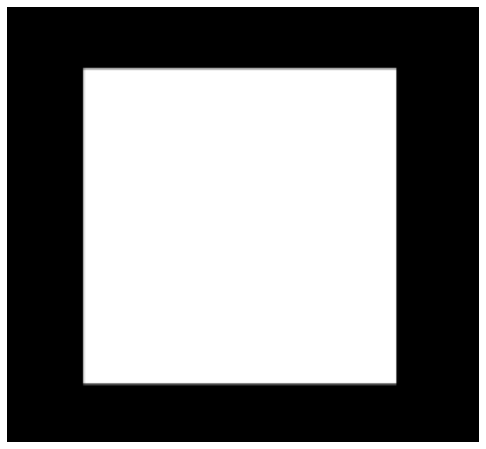

In [143]:
plt.rcParams['figure.figsize'] = [16, 8]


A = imread('/content/drive/MyDrive/Datasets/comborda.png')
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

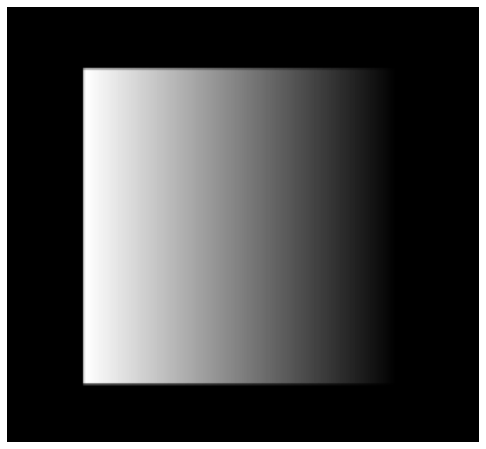

In [147]:
plt.rcParams['figure.figsize'] = [16, 8]


A = imread('/content/drive/MyDrive/Datasets/semborda.png')
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

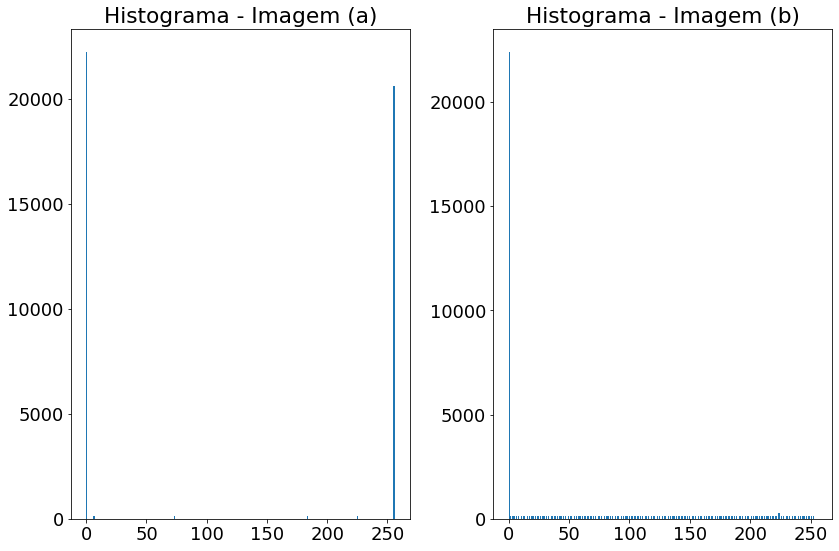

In [140]:
#Carrega a imagem com borda
img_com_borda = cv2.imread("/content/drive/MyDrive/Datasets/comborda.png")
img_com_borda = cv2.cvtColor(img_com_borda, cv2.COLOR_RGB2GRAY)

#Carrega a imagem sem borda
img_sem_borda = cv2.imread("/content/drive/MyDrive/Datasets/comborda.png")
img_sem_borda = cv2.cvtColor(img_sem_borda, cv2.COLOR_RGB2GRAY)

#Calcula e exibe os histogramas de ambas imgens
fig = plt.figure()
ax1  = fig.add_subplot(121)
ax1.hist(img_com_borda.ravel(), 256, [0,256])
ax1.set_title('Histograma - Imagem (a)')
ax2  = fig.add_subplot(122)
ax2.hist(img_sem_borda.ravel(), 256, [0, 255])
ax2.set_title('Histograma - Imagem (b)')
plt.tight_layout()
plt.show()

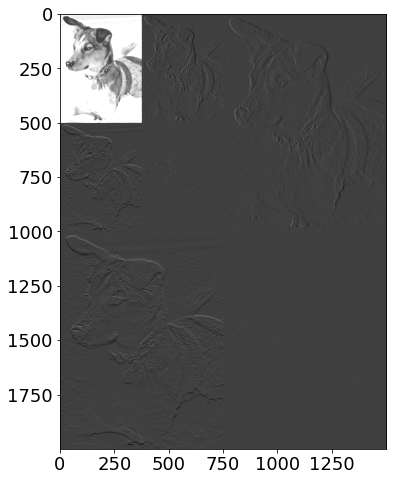

In [148]:
## Wavelet decomposition (2 level)
n = 2
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

# normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)



plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
plt.show()

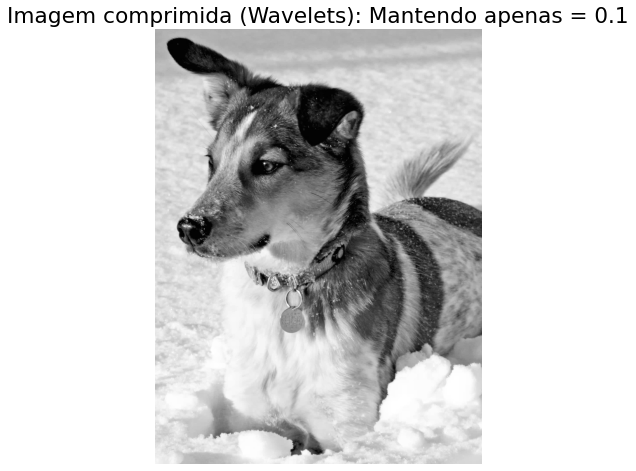

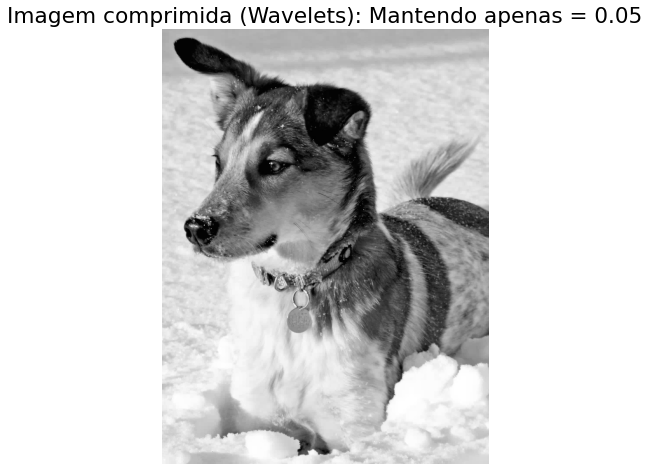

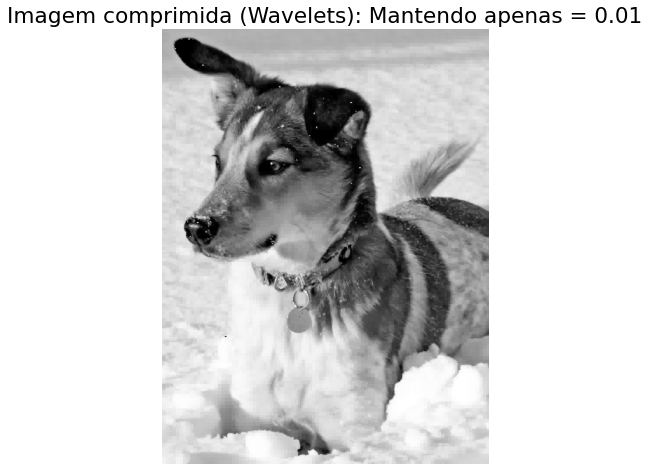

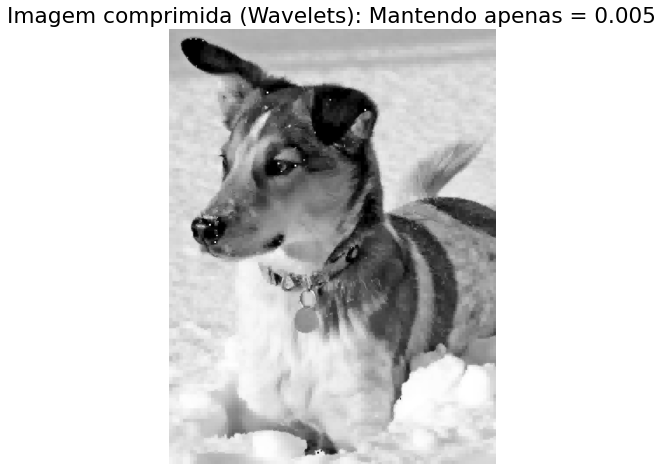

In [154]:
## Wavelet Compression
n = 4
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('Imagem comprimida (Wavelets): Mantendo apenas = ' + str(keep))
